In [1]:
import analysis_functions as af

import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt

In [5]:
def baby_analysis(
    true_cols = ['B_0' , 'B_1'],
    path_modifier = 'p=2_part_num=10',
    exp_num_id = -1
):
    
    beta_file_path = 'Beta_t_Xy_N=400_Epoch_N=40_Nt=4_p='+str(len(true_cols))+'.csv'
    i = str(exp_num_id)

    no_comm_input_path = "results_emb_par_fit_test_no_commXy_N=400_Epoch_N=40_Nt=4_"+path_modifier+"_exp_num="+str(i)+".csv"
    with_comm_input_path = "results_emb_par_fit_test_with_commXy_N=400_Epoch_N=40_Nt=4_"+path_modifier+"_exp_num="+str(i)+".csv"
    
    step_size = 10 # * 4 = Epoch_N
    pre_run = af.analyze_run(with_comm_input_path, beta_file_path, step_size, true_cols, comm = True, col='pre_shuffel_params')
    post_run = af.analyze_run(with_comm_input_path, beta_file_path, step_size, true_cols, comm = True, col='post_shuffel_params')
    no_com_run = af.analyze_run(no_comm_input_path, beta_file_path, step_size, true_cols, comm = False, col='pre_shuffel_params')
    
    plt.plot(pre_run.get_unique_particle_count_by_epoch(pre_post='pre'), 'x')
    plt.plot(post_run.get_unique_particle_count_by_epoch(pre_post='post'), '.')
    plt.plot(no_com_run.get_unique_particle_count_by_epoch(pre_post='pre'), '>')
    #plt.title("unique particles")#plt.title("total unique particles by epoch")
    plt.show()
    
    plt.plot(pre_run.get_unique_particle_count_by_epoch_and_shard(pre_post='pre'))
    plt.title=("Pre Comm")
    plt.show()
    
    plt.plot(post_run.get_unique_particle_count_by_epoch_and_shard(pre_post='post'))
    plt.title=("Post Comm")
    plt.show()
    
    plt.plot(no_com_run.get_unique_particle_count_by_epoch_and_shard(pre_post='pre'))
    plt.title=("No Comm")
    plt.show()
    
    no_comm_runs = list()
    with_comm_runs = list()
    with_comm_pre = list()
    with_comm_post = list()
    experiment_number_ids = [-1]
    for i in [-1]:
        step_size = 10 # * 4 = Epoch_N
        no_comm_run_i = af.analyze_run(no_comm_input_path, beta_file_path, step_size, true_cols, comm=False)
        no_comm_runs.append(no_comm_run_i)
    
        step_size = 10 # * 4 = Epoch_N
        with_comm_run_i = af.analyze_run(with_comm_input_path, beta_file_path, step_size, true_cols, comm = True, col='final_params')
        with_comm_runs.append(with_comm_run_i)
        
        with_comm_pre_i = af.analyze_run(with_comm_input_path, beta_file_path, step_size, true_cols, comm = True, col='pre_shuffel_params')
        with_comm_pre.append(with_comm_pre_i)
        
        with_comm_post_i = af.analyze_run(with_comm_input_path, beta_file_path, step_size, true_cols, comm = True, col='post_shuffel_params')
        with_comm_post.append(with_comm_post_i)
        
        
        
    for i in experiment_number_ids:
        plt.plot(no_comm_runs[i].esti_lik, color = 'b', alpha=0.5, marker='o')
        plt.plot(with_comm_runs[i].esti_lik, color = 'r', alpha=0.5, marker='>')
    plt.show()
    
    for i in experiment_number_ids:
        
        plt.plot(with_comm_pre[i].esti_lik, color = 'pink', alpha=0.5, marker='o')
        plt.plot(with_comm_post[i].esti_lik, color = 'purple', alpha=0.5, marker='>')
    plt.show()

## predictors = 2

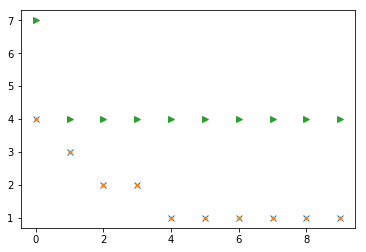

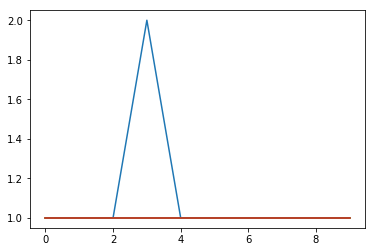

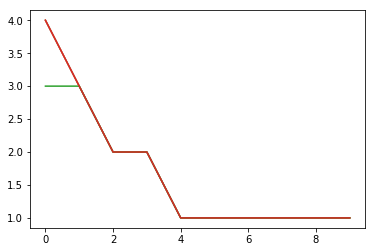

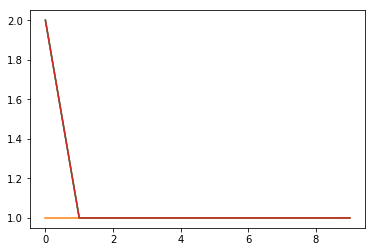

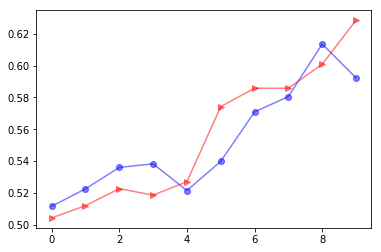

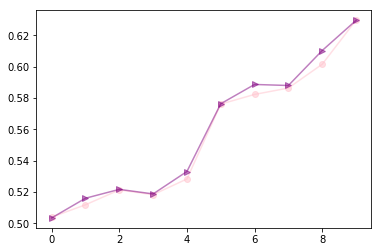

In [6]:
baby_analysis(
    true_cols = ['B_0' , 'B_1'],
    path_modifier = "p=2_part_num=10",
    exp_num_id = -1
)

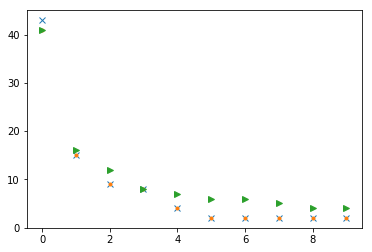

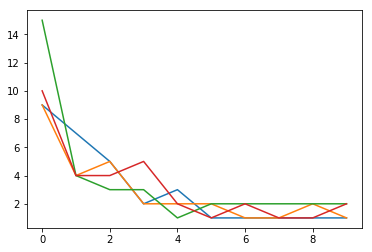

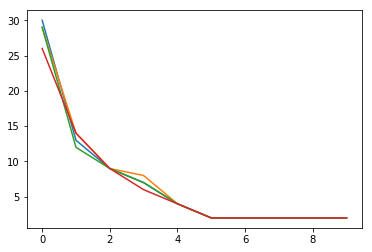

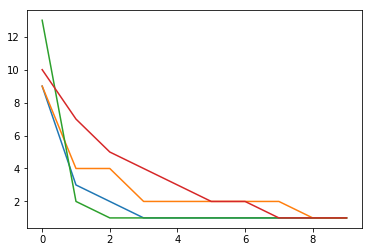

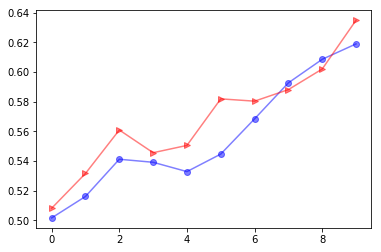

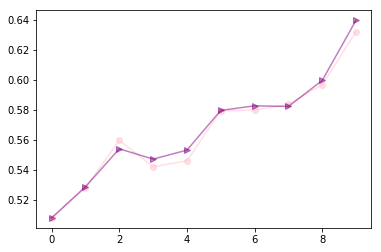

In [7]:
baby_analysis(
    true_cols = ['B_0' , 'B_1'],
    path_modifier = "p=2_part_num=100",
    exp_num_id = -1
)

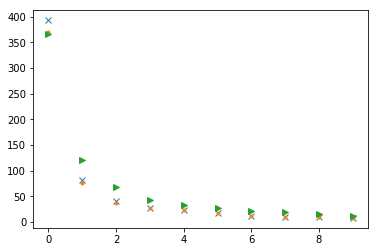

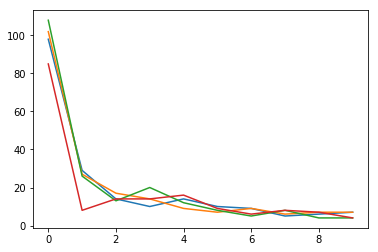

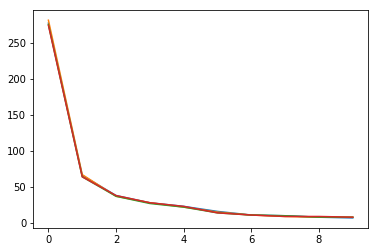

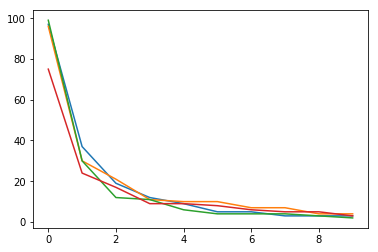

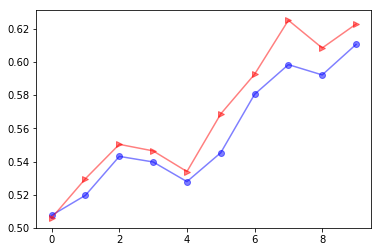

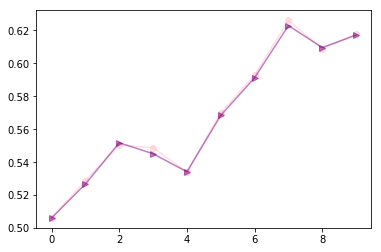

In [8]:
baby_analysis(
    true_cols = ['B_0' , 'B_1'],
    path_modifier = "p=2_part_num=1000",
    exp_num_id = -1
)

In [9]:
baby_analysis(
    true_cols = ['B_0' , 'B_1'],
    path_modifier = "p=2_part_num=10000",
    exp_num_id = -1
)

KeyError: 'particle_history_ids'

## predictors = 4

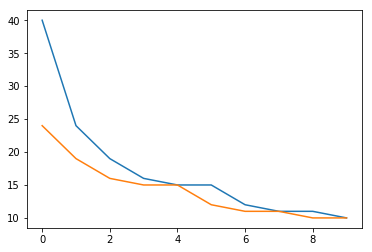

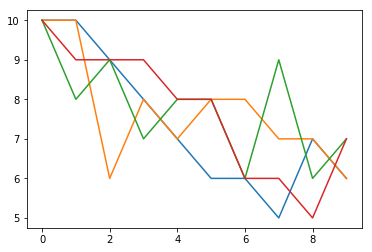

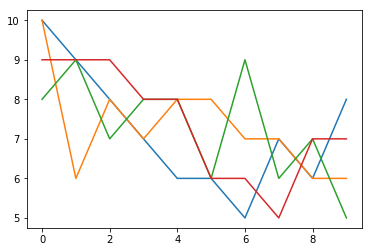

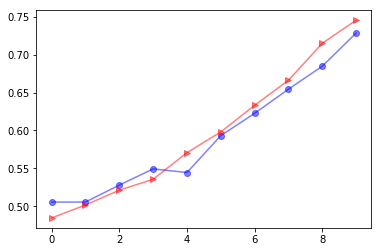

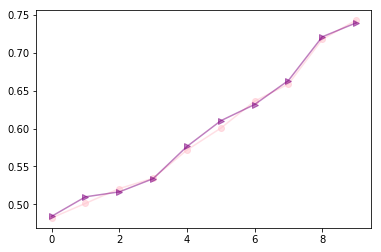

In [27]:
baby_analysis(
    true_cols = ['B_0' , 'B_1', 'B_2', 'B_3'],
    path_modifier = "p=4_part_num=10",
    exp_num_id = -1
)

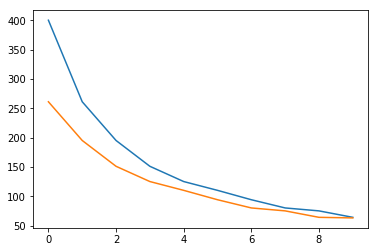

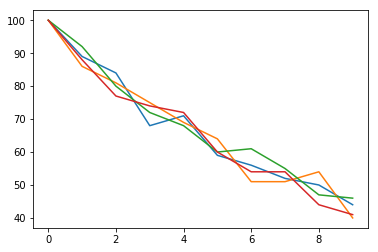

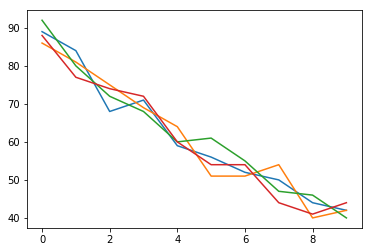

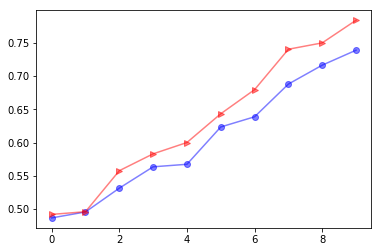

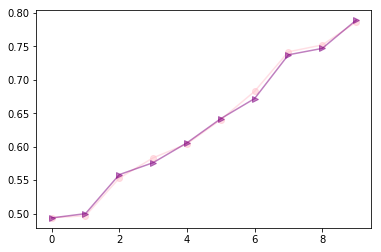

In [28]:
baby_analysis(
    true_cols = ['B_0' , 'B_1', 'B_2', 'B_3'],
    path_modifier = "p=4_part_num=100",
    exp_num_id = -1
)

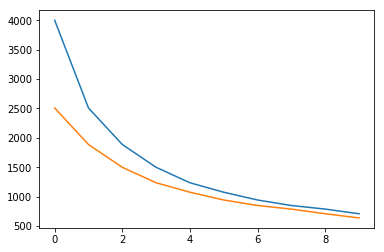

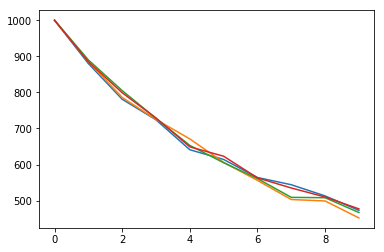

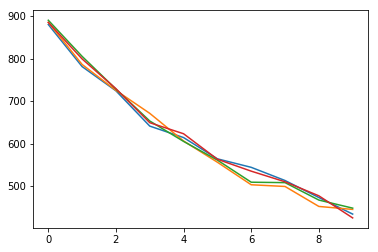

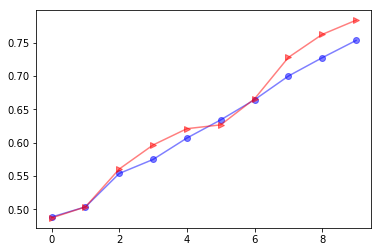

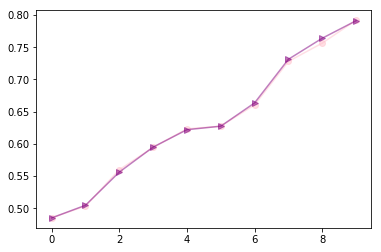

In [29]:
baby_analysis(
    true_cols = ['B_0' , 'B_1', 'B_2', 'B_3'],
    path_modifier = "p=4_part_num=1000",
    exp_num_id = -1
)

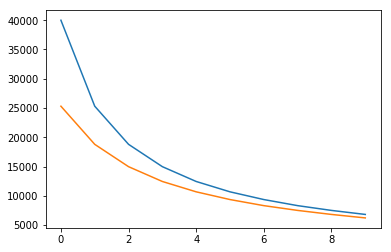

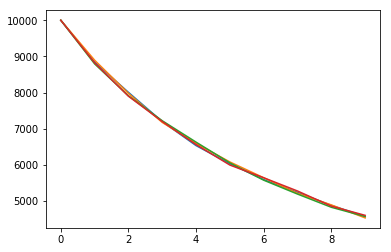

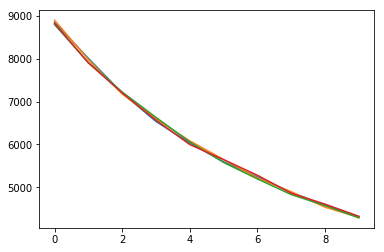

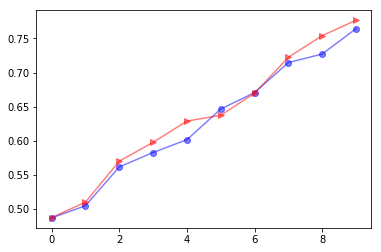

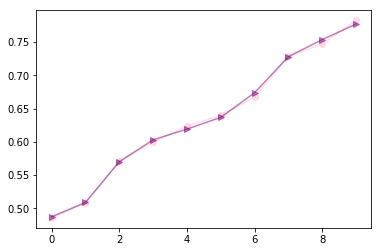

In [30]:
baby_analysis(
    true_cols = ['B_0' , 'B_1', 'B_2', 'B_3'],
    path_modifier = "p=4_part_num=10000",
    exp_num_id = -1
)

## predictors = 8

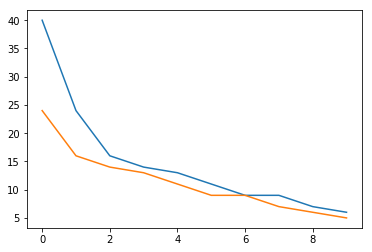

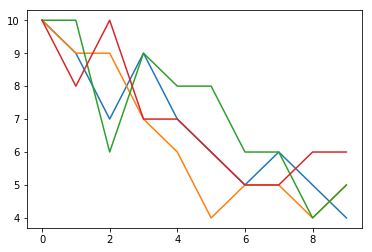

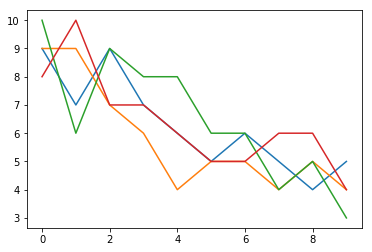

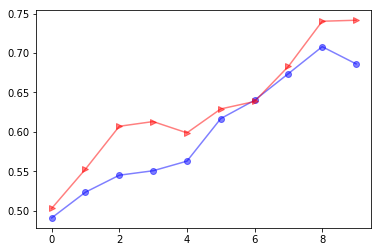

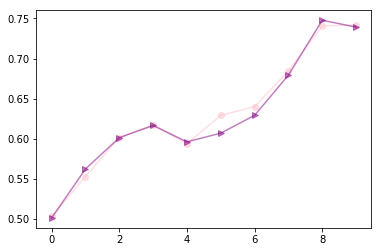

In [32]:
baby_analysis(
    true_cols = ['B_0' , 'B_1', 'B_2', 'B_3', 'B_4' , 'B_5', 'B_6', 'B_7'],
    path_modifier = "p=8_part_num=10",
    exp_num_id = -1
)

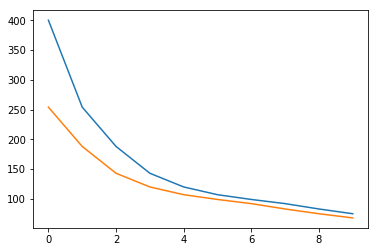

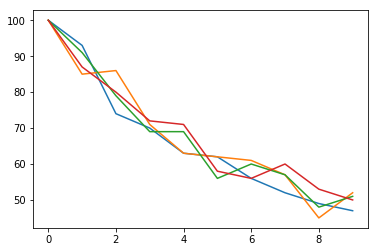

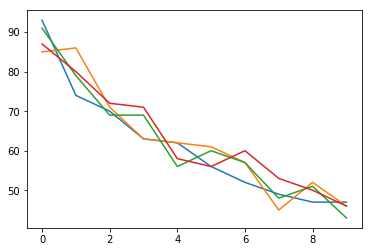

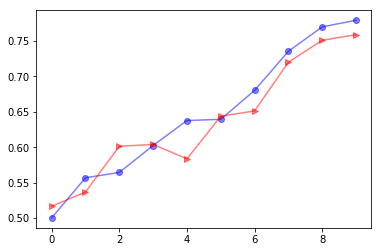

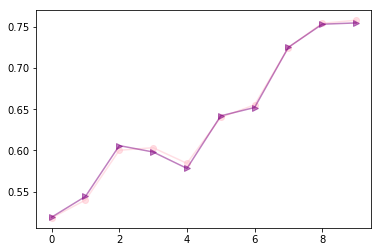

In [33]:
baby_analysis(
    true_cols = ['B_0' , 'B_1', 'B_2', 'B_3', 'B_4' , 'B_5', 'B_6', 'B_7'],
    path_modifier = "p=8_part_num=100",
    exp_num_id = -1
)

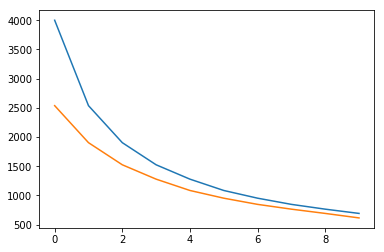

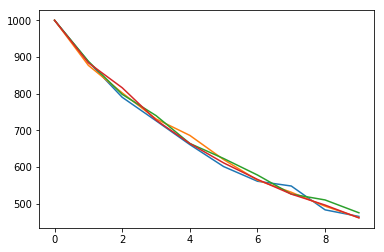

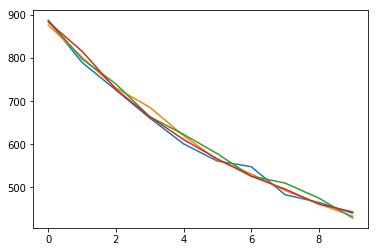

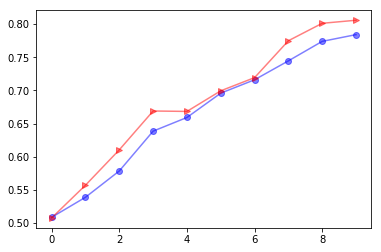

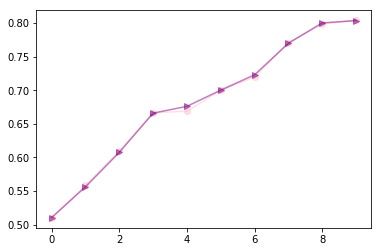

In [35]:
baby_analysis(
    true_cols = ['B_0' , 'B_1', 'B_2', 'B_3', 'B_4' , 'B_5', 'B_6', 'B_7'],
    path_modifier = "p=8_part_num=1000",
    exp_num_id = -1
)

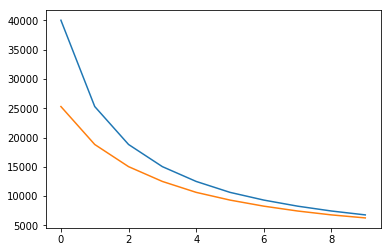

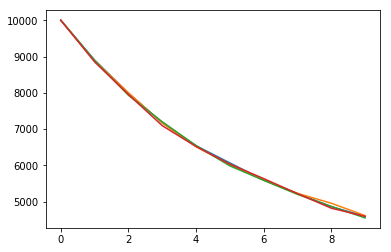

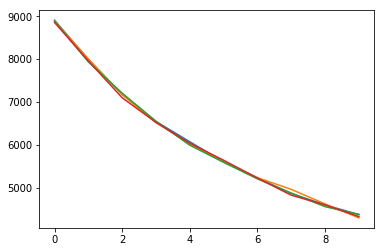

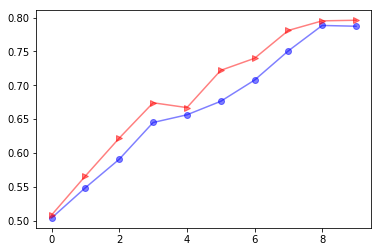

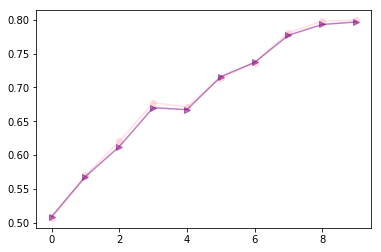

In [36]:
baby_analysis(
    true_cols = ['B_0' , 'B_1', 'B_2', 'B_3', 'B_4' , 'B_5', 'B_6', 'B_7'],
    path_modifier = "p=8_part_num=10000",
    exp_num_id = -1
)

## predictors = 16

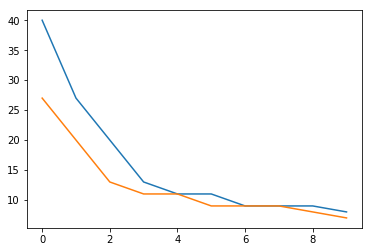

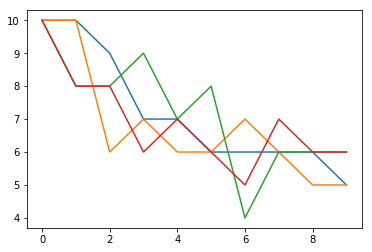

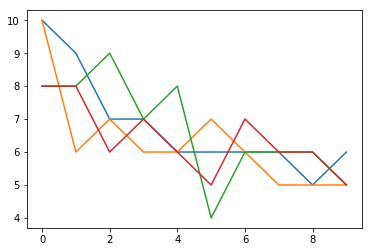

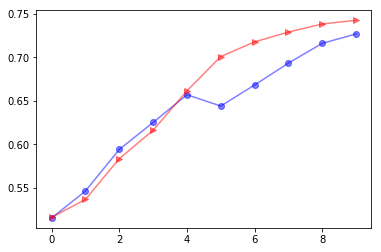

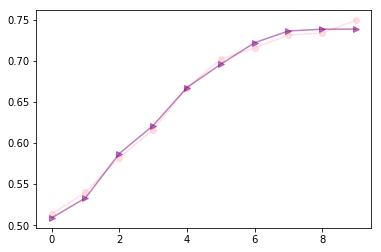

In [38]:
baby_analysis(
    true_cols = [
        'B_0' , 'B_1', 'B_2', 'B_3', 'B_4' , 'B_5', 'B_6', 'B_7', 
        'B_8' , 'B_9', 'B_10', 'B_11', 'B_12' , 'B_13', 'B_14', 'B_15'],
    path_modifier = "p=16_part_num=10",
    exp_num_id = -1
)

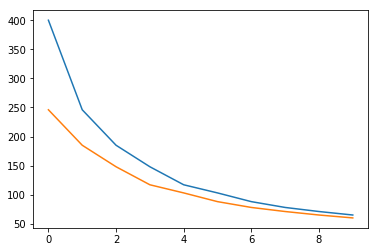

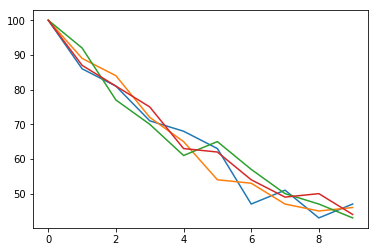

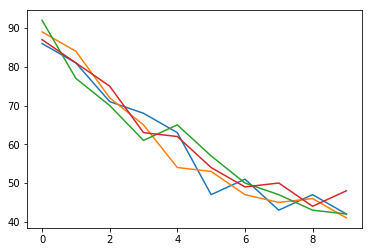

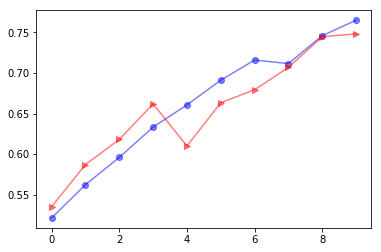

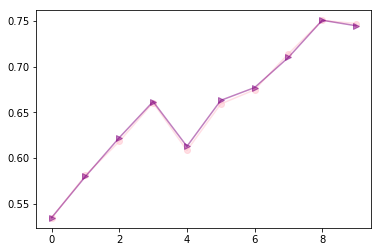

In [39]:
baby_analysis(
    true_cols = [
        'B_0' , 'B_1', 'B_2', 'B_3', 'B_4' , 'B_5', 'B_6', 'B_7', 
        'B_8' , 'B_9', 'B_10', 'B_11', 'B_12' , 'B_13', 'B_14', 'B_15'],
    path_modifier = "p=16_part_num=100",
    exp_num_id = -1
)

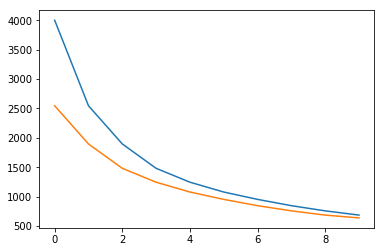

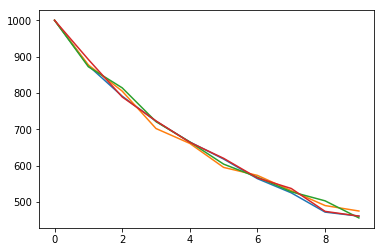

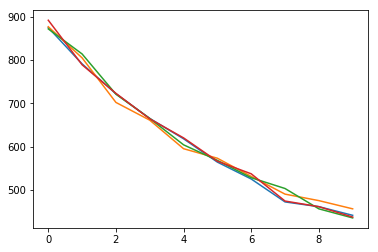

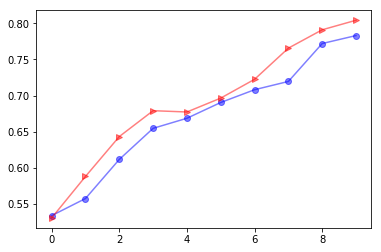

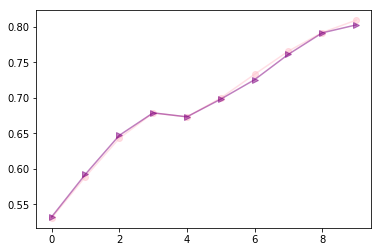

In [40]:
baby_analysis(
    true_cols = [
        'B_0' , 'B_1', 'B_2', 'B_3', 'B_4' , 'B_5', 'B_6', 'B_7', 
        'B_8' , 'B_9', 'B_10', 'B_11', 'B_12' , 'B_13', 'B_14', 'B_15'],
    path_modifier = "p=16_part_num=1000",
    exp_num_id = -1
)

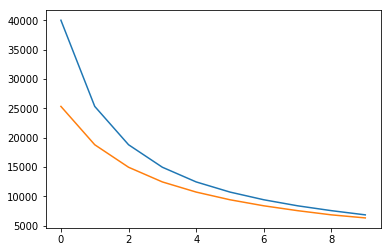

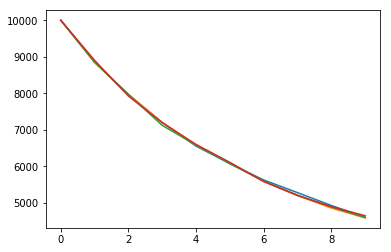

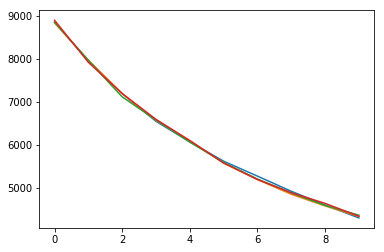

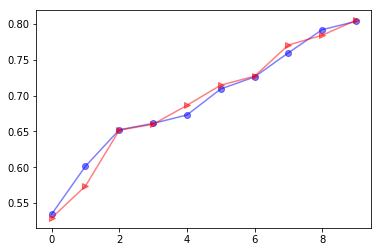

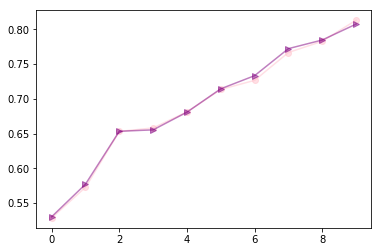

In [41]:
baby_analysis(
    true_cols = [
        'B_0' , 'B_1', 'B_2', 'B_3', 'B_4' , 'B_5', 'B_6', 'B_7', 
        'B_8' , 'B_9', 'B_10', 'B_11', 'B_12' , 'B_13', 'B_14', 'B_15'],
    path_modifier = "p=16_part_num=10000",
    exp_num_id = -1
)